# Classifying sentences: part 2 classifying sentences

In this post, I make a bag-of-words classifier for the clustered sentences. I am using the question pairs dataset from Kaggle (https://www.kaggle.com/quora/question-pairs-dataset). As mentioned in "Classifying sentences: part 1 clustering sentences", I used the maximum similarity of question pairs across all questions. The diagram below shows how the sentences were grouped in the part 1 clustering sentences post. The group topics are emergently found from the data by simply grouping sentences lexically. 

In this post, I classify sentences using the clustered sentence groups.

Check out github for the supporting python subfunctions : https://github.com/j622amilah/Classify_sentences!

<img src="How_sa_are_grouped.png" alt="Drawing" style="width: 600px;"/>

In [1]:
%load_ext autoreload 
%autoreload 2

# Loading Data on Kaggle

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df = pd.read_csv("/kaggle/input/question-pairs-dataset/questions.csv")

# Loading Data on PC

In [22]:
import numpy as np
import pandas as pd
import nltk

# Personal python functions
import sys
sys.path.insert(1, 'C:\\Users\\jamilah\\Documents\\Subfunctions_python')

from make_a_properlist import *
from findall import *
from isnan import *
from pandas_fillna_percolumn import *
from pandas_rename_columns import *
from is_empty import *

from pandas_array2df import *

from string_text_processing.make_a_properlist_str import *
from string_text_processing.get_cossine_similarity import *
from string_text_processing.preprocessing import *
from string_text_processing.get_word_count_uniquewords import *
from string_text_processing.remove_chars_from_wordtoken import *
from string_text_processing.detect_numbers_from_wordtokens import *

from string_text_processing.calc_cossim_mat_of_2sen_arr import *
from string_text_processing.get_unique_sen_grpsWITHmax_MAIN import *
from string_text_processing.get_unique_sen_grpsWITHmax import *
from string_text_processing.is_sen_in_senarray import *
from string_text_processing.unique_str_arrays import *
from string_text_processing.pandas_visualize_senarr import *
from string_text_processing.unique_senarr import *
from string_text_processing.minimally_regroup_senarr2 import *
from string_text_processing.reshuffle_repeating_keywords_2A_single_grp import *

from string_text_processing.senarray_to_onehot import *
from string_text_processing.sen_to_onehot import *

from scikit_functions import *

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\\Users\\jamilah\\Documents\\Github_analysis_PROJECTS\\Text_analysis\\Classify_sentences\\Classify_sentences_part1\\questions.csv")
# df = pd.read_csv("C:\\Users\\jamilah\\Documents\\Github_analysis_PROJECTS\\Text_analysis\\Classify_sentences_by_keywords\\questions.csv", encoding = "Windows-1252")

In [11]:
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,404348,789796,789797,What is one coin?,What's this coin?,0
404349,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [4]:
sen1_temp = df.question1.to_numpy()
sen2_temp = df.question2.to_numpy()

# only take first 100, 200
k = 200
sen1_temp = sen1_temp[0:k]
sen2_temp = sen2_temp[0:k]
# print('sen1_temp: ', sen1_temp)

# Tokenize each sentence
sen1_ar = []
sen2_ar = []
for ind, s1 in enumerate(sen1_temp):
    sen1_ar.append(s1.split())
    sen2_ar.append(sen2_temp[ind].split())

In [5]:
print('Sentence 1: ', sen1_ar[0:10])
print('Sentence 2: ', sen2_ar[0:10])

Sentence 1:  [['What', 'is', 'the', 'step', 'by', 'step', 'guide', 'to', 'invest', 'in', 'share', 'market', 'in', 'india?'], ['What', 'is', 'the', 'story', 'of', 'Kohinoor', '(Koh-i-Noor)', 'Diamond?'], ['How', 'can', 'I', 'increase', 'the', 'speed', 'of', 'my', 'internet', 'connection', 'while', 'using', 'a', 'VPN?'], ['Why', 'am', 'I', 'mentally', 'very', 'lonely?', 'How', 'can', 'I', 'solve', 'it?'], ['Which', 'one', 'dissolve', 'in', 'water', 'quikly', 'sugar,', 'salt,', 'methane', 'and', 'carbon', 'di', 'oxide?'], ['Astrology:', 'I', 'am', 'a', 'Capricorn', 'Sun', 'Cap', 'moon', 'and', 'cap', 'rising...what', 'does', 'that', 'say', 'about', 'me?'], ['Should', 'I', 'buy', 'tiago?'], ['How', 'can', 'I', 'be', 'a', 'good', 'geologist?'], ['When', 'do', 'you', 'use', 'シ', 'instead', 'of', 'し?'], ['Motorola', '(company):', 'Can', 'I', 'hack', 'my', 'Charter', 'Motorolla', 'DCX3400?']]
Sentence 2:  [['What', 'is', 'the', 'step', 'by', 'step', 'guide', 'to', 'invest', 'in', 'share', 'mar

# Find the duplicate Questions in the dataset
Compare your answer with the is_duplicate column.  

In [113]:
# 0-0.5 OR nan = non-similar
# 0.5-1 = similar
sim_thresh = 0.5

# Calculate cos sine similarity between sentence pairs
cos_sim_all = []
for ind, s1 in enumerate(sen1_ar):
    cos_sim = get_cossine_similarity(s1, ind, sen2_ar)
    cos_sim_all.append(cos_sim)
cos_sim_all = make_a_properlist(cos_sim_all)

# Create a new column that tells if the sentence pair is similar or NOT
sim = 0
nonsim = 1  #'nonsim'

cs_word = []
for i in cos_sim_all:
    if isnan(i) == True:
        cs_word.append(nonsim)
    else:
        if i > sim_thresh:
            cs_word.append(sim)
        else:
            cs_word.append(nonsim)
cs_word = np.array(cs_word)

# ----------------------

# Add two vectors to df_short
data = df.id.to_numpy()[0:k], df.qid1.to_numpy()[0:k], df.qid2.to_numpy()[0:k], sen1_ar, sen2_ar, df.is_duplicate.to_numpy()[0:k], cos_sim_all, cs_word
df_short = pandas_array2df(data)

col_list = ['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate', 'cosine_sim', 'cs']
df2 = pandas_rename_columns(df_short, col_list)

# Replace nan with zero
df2.cosine_sim = pandas_fillna_percolumn(df2.cosine_sim, 0)

# Accuracy percentage between given is_duplicate and calculated cosine_sim
cs = df2.cosine_sim.to_numpy()
is_dup = df2.is_duplicate.to_numpy()
cor = 0
n_samples = len(cs)
for i in range(n_samples):
    if np.sum(cs[i] - is_dup[i]) == 0:
        cor = cor + 1
print("Similarity accuracy: " + str((cor/n_samples)*100) + "%")

# to display full dataframe information
pd.set_option('display.max_colwidth', None)

df2

shape of data :  (200, 8)
Similarity accuracy: 10.0%


,id,qid1,qid2,question1,question2,is_duplicate,cosine_sim,cs
0,0,1,2,"[What, is, the, step, by, step, guide, to, invest, in, share, market, in, india?]","[What, is, the, step, by, step, guide, to, invest, in, share, market?]",0,0.915209,0
1,1,3,4,"[What, is, the, story, of, Kohinoor, (Koh-i-Noor), Diamond?]","[What, would, happen, if, the, Indian, government, stole, the, Kohinoor, (Koh-i-Noor), diamond, back?]",0,0.668153,0
2,2,5,6,"[How, can, I, increase, the, speed, of, my, internet, connection, while, using, a, VPN?]","[How, can, Internet, speed, be, increased, by, hacking, through, DNS?]",0,0.462910,1
3,3,7,8,"[Why, am, I, mentally, very, lonely?, How, can, I, solve, it?]","[Find, the, remainder, when, [math]23^{24}[/math], is, divided, by, 24,23?]",0,0.000000,1
4,4,9,10,"[Which, one, dissolve, in, water, quikly, sugar,, salt,, methane, and, carbon, di, oxide?]","[Which, fish, would, survive, in, salt, water?]",0,0.392232,1
...,...,...,...,...,...,...,...,...
195,195,391,392,"[What, is, the, work, of, an, executive, recruiter, like?]","[What, is, it, like, to, work, with, an, executive, recruiter?]",0,0.745356,0
196,196,393,394,"[Which, psychological, need, does, 'collecting', fulfill?]","[Why, do, people, collect, things?]",0,0.000000,1
197,197,395,396,"[What, are, some, must, watch, TV, shows, before, you, die?]","[Are, there, any, must, watch, TV, shows?]",1,0.547723,0
198,198,397,398,"[How, can, I, become, more, fluent, in, Chinese?]","[How, can, I, become, fluent, in, chinese?]",1,0.866025,0


We can see that the is_duplicate column is only 10 percent similar to the calculated cosine similarity.  And the calculated cosine similarity appears to be more accurate, based on human inspection, than the given is_duplicate column.

# Cluster sentences 

By clustering similar sentences a label per sentence can be assigned, such that we can classify similar sentences.  We make a similarity matrix between sentences and find maximum similarity sentence pairs for each matrix entry.  Then we take the first sentence in each group as a 'representative group sentence', and repeat the similarity matrix analysis until all the sentences are reduced into a few major groups.  I do not know if this algorithm already exists, but it appears to be one of the most straight forward way to cluster sentences.  

Another method to group sentences could be to use an existing word embedding matrix: 1) calculate the embedding vector per word for each sentence, 2) sum the word embedding vectors to obtain a sentence embedding vector, 3) then group similar sentence embedding vectors.

## Group sentences into similar groups based on maximal similarity

Total sentences:  249
Total sentences grouped :  157
r:  78
Total sentences:  249
Total sentences grouped :  136
r:  68
Total sentences:  249
Total sentences grouped :  111
r:  55
Total sentences:  249
Total sentences grouped :  92
r:  46
Total sentences:  249
Total sentences grouped :  82
r:  41
Total sentences:  249
Total sentences grouped :  73
r:  36
Total sentences:  249
Total sentences grouped :  58
r:  29
Total sentences:  249
Total sentences grouped :  52
r:  26
Total sentences:  249
Total sentences grouped :  44
r:  22
Total sentences:  249
Total sentences grouped :  36
r:  18
Total sentences:  249
Total sentences grouped :  29
r:  14
Total sentences:  249
Total sentences grouped :  22
r:  11
Total sentences:  249
Total sentences grouped :  16
r:  8
Total sentences:  251
Total sentences grouped :  12
The number of sentences per sentence group :  [2, 1, 2, 1, 1, 16, 79, 1, 2, 141, 3, 2]
Main sentence groups :  [5, 6, 9]
Total sentences grouped :  3


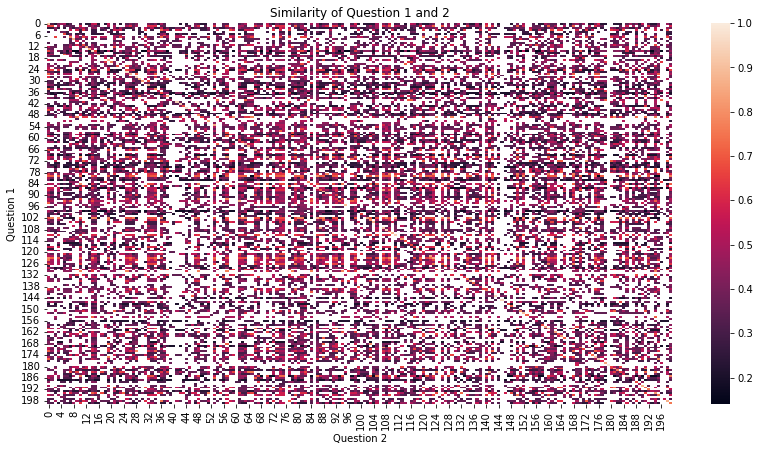

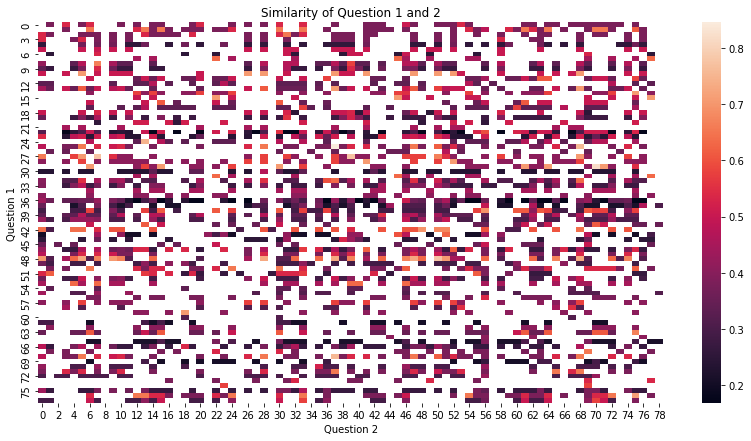

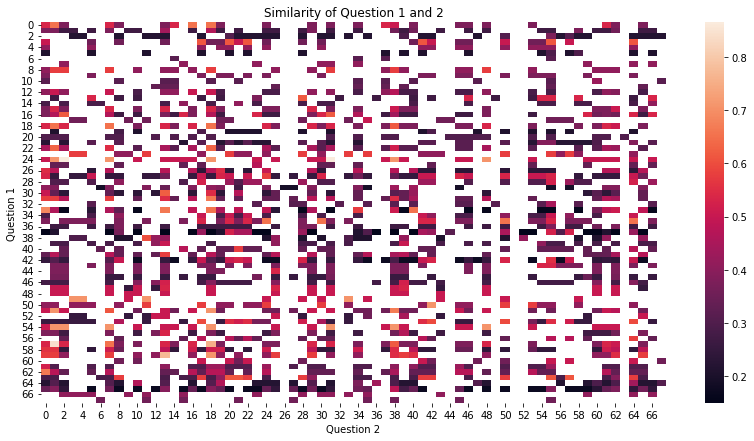

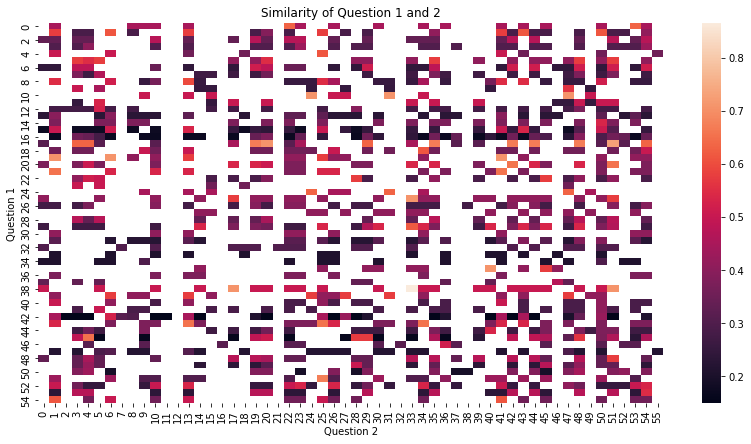

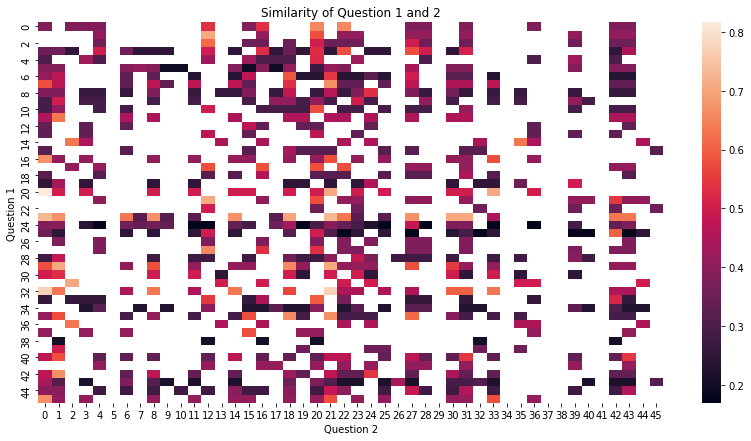

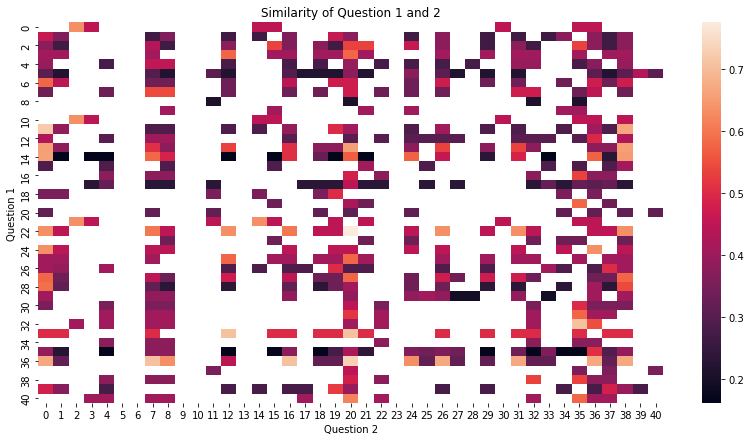

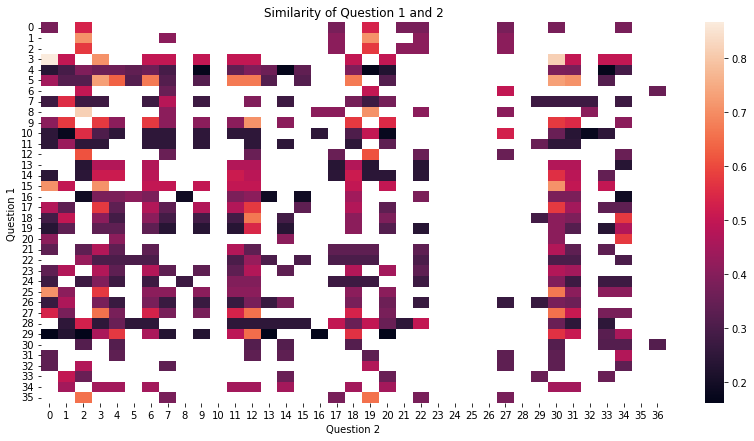

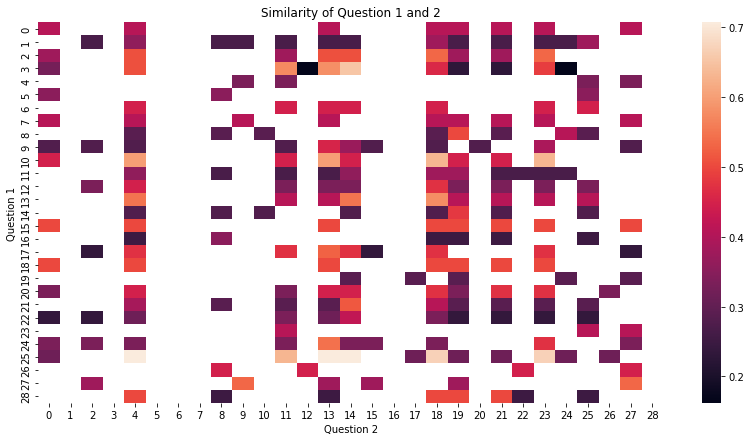

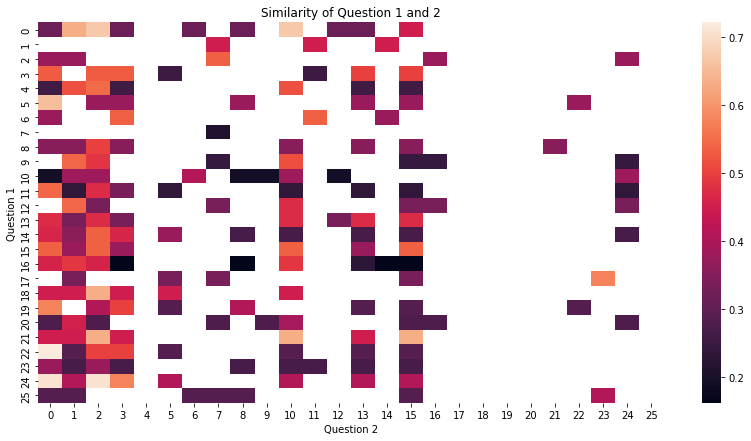

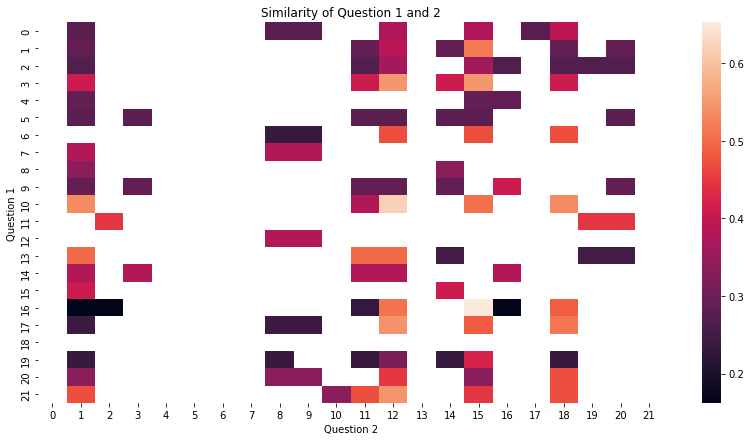

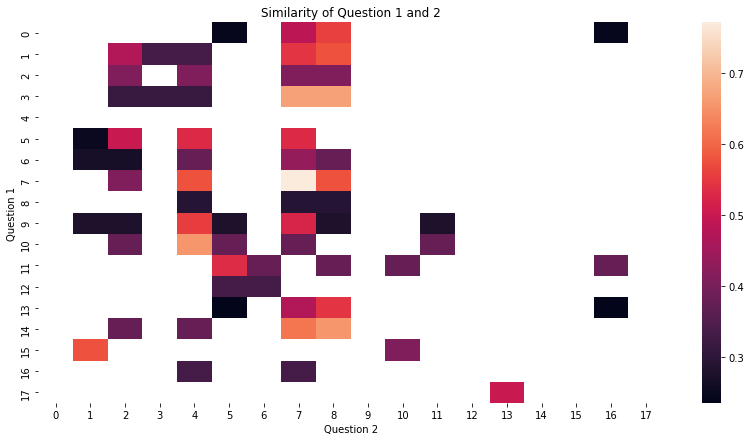

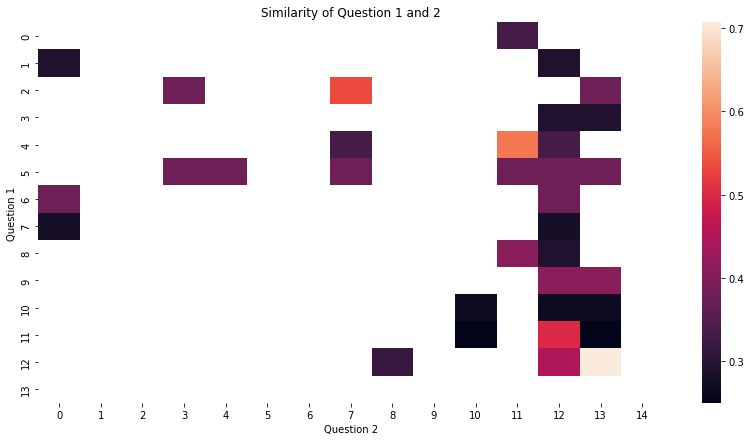

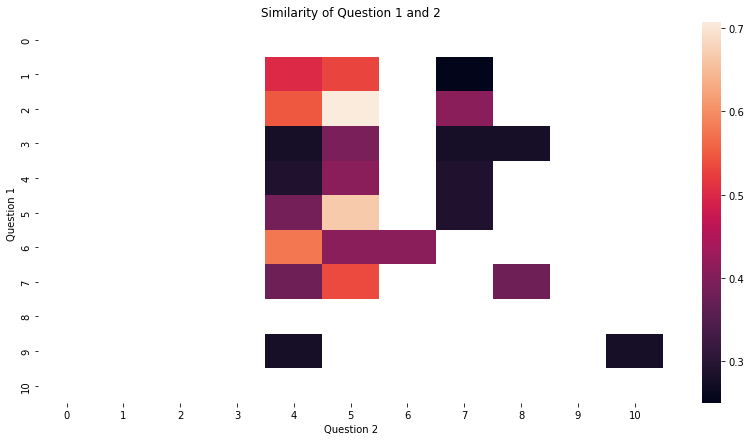

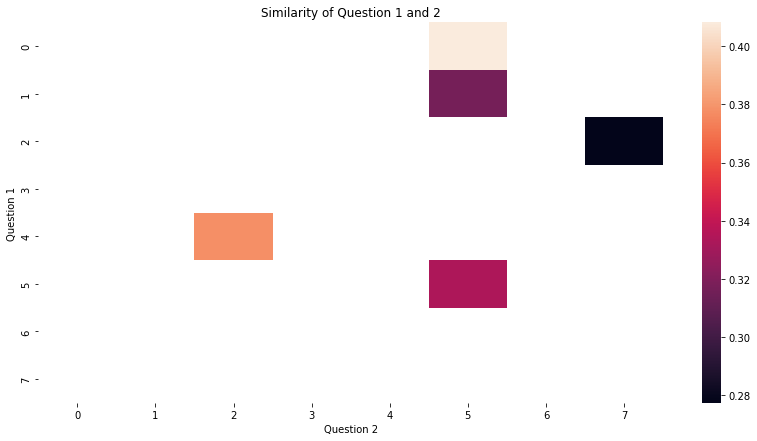

In [6]:
sim_thresh = 0.2
plotORnot = 1
grp_new, df_grp1, num_of_sensPERgrp = get_unique_sen_grpsWITHmax_MAIN(sen1_ar, sen2_ar, sim_thresh, plotORnot)

In [199]:
df_grp1

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,"[[How, can, I, use, Twitter, for, business?]]","[[How, is, career, launcher, online, program, for, RBI, Grade, B?]]","[[How, do, we, prepare, for, UPSC?]]","[[How, do, I, prepare, for, civil, service?]]","[[How, should, I, prepare, for, CA, final, law?]]","[[How, one, should, know, that, he/she, completely, prepare, for, CA, final, exam?]]","[[What, tripod, should, I, get, for, my, Canon, 6D?]]","[[How, i, get, hair, on, bald, head?]]","[[How, could, I, get, Skype, to, work, on, an, android, 4.1.1, phone?]]","[[How, to, make, friends, ?]]",...,None,None,None,None,None,None,None,None,None,None
1,"[[How, do, I, find, a, startup, accelerator?]]","[[How, do, I, find, a, good, escort?]]","[[Where, can, I, find, a, conversion, chart, for, CC, to, horsepower?]]","[[How, can, I, check, wifi, history, and, access, it, through, android, phones?]]","[[I, cannot, open, Quora, through, my, WiFi, router., Why, can, I, only, access, it, through, a, mobile, network?]]","[[How, do, I, stop, being, over, possessive, for, a, person, whom, I, love?]]","[[I, want, to, make, a, travel, commercial/clip, video, HD, ,, For, India, and, New, Zealand., How, much, will, it, cost?]]","[[Can, I, make, 50,000, a, month, by, day, trading?]]","[[Can, I, make, 30,000, a, month, by, day, trading?]]","[[Can, I, take, rabies, injection, after, 1, day, of, dog, bite?]]",...,None,None,None,None,None,None,None,None,None,None
2,"[[What, is, a, narcissistic, personality, disorder?]]","[[What, is, narcissistic, personality, disorder?]]","[[Who, are, some, notable, folks, who, attended, Caltech?]]","[[What, is, a, Yantra, &, Mantra?]]","[[What, is, a, Horcrux?]]","[[What, is, performance, testing?]]","[[Between, Robert, De, Niro, and, Al, Pacino,, who, is, more, successful?]]","[[Who, do, you, regard, as, the, best, actor,, Robert, De, Niro, or, Al, Pacino?]]","[[Which, one, is, better, polo, diesel, or, grand, i10, petrol?]]","[[What, is, better, for, a, low, back, pain:, heat, or, ice?]]",...,"[[Why, do, some, people, prefer, to, live, with, small, family?]]","[[Why, India, does, not, apply, the, ""Burma-Rohingya, model"", to, deport, illegal, Bangladeshis?]]","[[What, are, some, mind-blowing, computer, tools, that, exist, that, most, people, don't, know, about?]]","[[What, are, some, mind-blowing, technologies, that, exist, that, most, people, don't, know, about?]]","[[What, causes, nightmares, that, seem, real?]]","[[In, how, many, ways, can, we, distribute, 10, identical, looking, pencils, to, 4, students, so, that, each, student, gets, at, least, one, pencil?]]","[[In, how, many, ways, 12, apples, can, be, distributed, among, 4, children, such, that, every, child, gets, at, least, 2, apples?]]","[[What's, one, thing, you, would, like, to, do, better?]]","[[What's, one, thing, you, do, despite, knowing, better?]]","[[How, do, sports, contribute, to, the, society?]]"


# Part 2 : Classifying sentences

## Re-organize sentence groups based on top word count per sentence group

To make each group classifys sentences on specific topics, we ensure that each group has unique keyword. Thus in this step, we search for repeating keywords across sentence groups, and then put sentences containing repeating keywords in the groups that have the largest keyword count. 

In [7]:
# Find keywords per sentence group
topwc = []
topkeywords = []
for sgrp in grp_new:
    word_tokens = make_a_properlist(sgrp)
    word_tokens = make_a_properlist(word_tokens)
    # print('word_tokens: ', word_tokens)

    # Get the theme of the knowledge base
    word_tokens2 = preprocessing(word_tokens)

    list_to_remove = ['https']
    wc, keywords, mat_sort = get_word_count_uniquewords(word_tokens2, list_to_remove)

    # Remove all numbers from the keyword list
    wt_nums, wt_nums_str, keywords2 = detect_numbers_from_wordtokens(keywords)

    topwc.append(wc[0:10])
    topkeywords.append(keywords2[0:10])

There are 169 word tokens, but 59 words are unique.
[['4' 'prepare']
 ['3' 'should']
 ['3' 'phone']
 ['2' 'final']
 ['2' 'deduction']
 ['2' 'number']
 ['2' 'quickbooks']
 ['2' 'having']
 ['2' 'support']
 ['1' 'business']
 ['1' 'customer']
 ['1' 'genuinely']
 ['1' 'friends']
 ['1' 'advice']
 ['1' 'files']
 ['1' 'expenses']
 ['1' 'essex']
 ['1' 'enjoy']
 ['1' 'dressing']
 ['1' 'after']
 ['1' 'android']
 ['1' 'couple']
 ['1' 'canon']
 ['1' 'could']
 ['1' 'corrupted']
 ['1' 'grade']
 ['1' 'completely']
 ['1' 'apartment']
 ['1' 'class']
 ['1' 'civil']
 ['1' 'chelmsford']
 ['1' 'career']
 ['1' 'without']
 ['1' 'launcher']
 ['1' 'helpful']
 ['1' 'program']
 ['1' 'tripod']
 ['1' 'there']
 ['1' 'tentative']
 ['1' 'skype']
 ['1' 'service']
 ['1' 'saving']
 ['1' 'sample']
 ['1' 'salad']
 ['1' 'recovery']
 ['1' 'recover']
 ['1' 'possible']
 ['1' 'imbalance']
 ['1' 'people']
 ['1' 'online']
 ['1' 'offer']
 ['1' 'norway']
 ['1' 'multi']
 ['1' 'mortgage']
 ['1' 'monthly']
 ['1' 'london']
 ['1' 'leavi

In [8]:
topkeywords

[['prepare',
  'should',
  'phone',
  'final',
  'deduction',
  'number',
  'quickbooks',
  'having',
  'support',
  'business'],
 ['india',
  'where',
  'google',
  'quora',
  'learn',
  'email',
  'people',
  'password',
  'gmail',
  'access'],
 ['between',
  'which',
  'quora',
  'there',
  'people',
  'battle',
  'about',
  'would',
  'better',
  'physics']]

In [9]:
# Reorganize sentence groups to have unique keywords
topkeywords, keywords2, grp_new = reshuffle_repeating_keywords_2A_single_grp(topkeywords, topwc, grp_new)

a:  [0, 0, 1]
b:  [1, 2, 2]
repword:  quora
wc_cur:  4
wc_next:  7
ind_grp1:  [4, 73, 76, 77]
repword:  people
wc_cur:  4
wc_next:  6
ind_grp1:  [67, 70, 74]
There are 169 word tokens, but 59 words are unique.
[['4' 'prepare']
 ['3' 'should']
 ['3' 'phone']
 ['2' 'final']
 ['2' 'deduction']
 ['2' 'number']
 ['2' 'quickbooks']
 ['2' 'having']
 ['2' 'support']
 ['1' 'business']
 ['1' 'customer']
 ['1' 'genuinely']
 ['1' 'friends']
 ['1' 'advice']
 ['1' 'files']
 ['1' 'expenses']
 ['1' 'essex']
 ['1' 'enjoy']
 ['1' 'dressing']
 ['1' 'after']
 ['1' 'android']
 ['1' 'couple']
 ['1' 'canon']
 ['1' 'could']
 ['1' 'corrupted']
 ['1' 'grade']
 ['1' 'completely']
 ['1' 'apartment']
 ['1' 'class']
 ['1' 'civil']
 ['1' 'chelmsford']
 ['1' 'career']
 ['1' 'without']
 ['1' 'launcher']
 ['1' 'helpful']
 ['1' 'program']
 ['1' 'tripod']
 ['1' 'there']
 ['1' 'tentative']
 ['1' 'skype']
 ['1' 'service']
 ['1' 'saving']
 ['1' 'sample']
 ['1' 'salad']
 ['1' 'recovery']
 ['1' 'recover']
 ['1' 'possible']
 [

In [10]:
topkeywords

[['prepare',
  'should',
  'phone',
  'final',
  'deduction',
  'number',
  'quickbooks',
  'having',
  'support',
  'business'],
 ['india',
  'where',
  'should',
  'learn',
  'email',
  'password',
  'product',
  'google',
  'gmail',
  'access'],
 ['quora',
  'people',
  'between',
  'which',
  'there',
  'battle',
  'through',
  'better',
  'questions',
  'about']]

## Create y label

In [12]:
y = []
for i, count in enumerate(num_of_sensPERgrp):
    vec = np.ones((count))
    x = [int(i*k) for k in vec]
    y.append(x)
y = make_a_properlist(y)
y = np.array(y)
print('size of y (sentences): ', y.shape)

# Confirmation of label
plotORnot = 1
if plotORnot == 1:
    import plotly.graph_objects as go
    fig = go.Figure()
    config = dict({'scrollZoom': True, 'displayModeBar': True, 'editable': True})
    xxORG = list(range(len(y)))
    xxORG
    fig.add_trace(go.Scatter(x=xxORG, y=y, name='y', line = dict(color='red', width=2, dash='dash'), showlegend=True))
    fig.update_layout(title='y label', xaxis_title='sentences', yaxis_title='group number')
    fig.show(config=config)

size of y (sentences):  (236,)


## Construct a one-hot word matrix

In [25]:
X, keywords2 = senarray_to_onehot(grp_new)

There are 2330 word tokens, but 592 words are unique.
[['11' 'which']
 ['11' 'people']
 ['11' 'quora']
 ...
 ['1' 'network']
 ['1' 'neutral']
 ['1' 'kohinoor']]
The following words were present:  ['which', 'people', 'quora', 'should', 'between', 'there', 'india', 'about', 'learn', 'better', 'battle', 'through', 'google', 'questions', 'where', 'speak', 'would', 'after', 'process', 'phone', 'access', 'things', 'employees', 'become', 'email', 'different', 'pakistan', 'password', 'support', 'physics', 'prepare', 'gmail', 'product', 'could', 'question', 'recover', 'attracted', 'looking', 'students', 'english', 'strongest', 'manager', 'state', 'market', 'being', 'class', 'possible', 'government', 'mythology', 'rohingya', 'difference', 'number', 'examples', 'business', 'other', 'offer', 'recovery', 'getting', 'travel', 'harry', 'first', 'account', 'greatest', 'family', 'increase', 'against', 'instagram', 'website', 'experience', 'currently', 'hindu', 'personality', 'darth', 'deduction', 'data

## Divide data into training and test set

In [26]:
X_train, X_test, Y_train_1D, Y_test_1D = do_train_test_split(X, y)

shape of X_train :  (177, 592)
shape of Y_train_1D :  (177,)
shape of X_test :  (59, 592)
shape of Y_test_1D :  (59,)


### Verify that the sentences were encoded properly

In [27]:
def onehot_2_text(oh_vec, keywords):
    
    newvec, ind_newvec = findall(oh_vec, '==', 1)
    sen = [keywords[i] for i in ind_newvec]
    
    return sen

In [170]:
# The sentences are out-of-order, but they are correctly transformed
for i in range(X_train.shape[0]):
    oh_vec = X_train[i,:]
    sen = onehot_2_text(oh_vec, keywords2)
    print(sen)

['thing', 'despite', 'knowing']
['people', 'exist', 'technologies']
['executive', 'recruiter']
['courses', 'along', 'taken']
['through', 'process', 'interview', 'making']
[]
['manipulation']
['better', 'diesel', 'grand']
['should']
['meaning']
[]
['whether', 'matter', 'selfish', 'humans']
[]
[]
['learn', 'speak']
['become']
['happy']
['physics', 'should', 'reference', 'choose', 'chemistry']
['there']
['offer']
['civil']
['electrical', 'mineral', 'highest', 'holds']
['after']
['become']
['website', 'members']
['better']
['market']
['could', 'darth', 'snoke', 'killed', 'plagueis']
[]
['through', 'access']
['looking', 'grads', 'majors', 'recruit', 'universities']
['regular']
[]
['battle', 'contrast', 'compare', 'significance']
[]
['increase']
['under', 'earphones']
['employees', 'options', 'offer', 'currently', 'stock']
['social']
['question']
['regular']
['secretly']
['notes', 'estate', 'rupee', 'scrapping', 'impact']
['people', 'there', 'control', 'already', 'initiative']
['there']
[]
[

## scikit : bag-of-words classification

In [166]:
# Multilayer perceptron (MLP)/neural network (Deep Learning) : logistic regression NN
model, Y_train_bin, Y_test_bin, Y_train_bin_predict, Y_test_bin_predict, Y_train_bin_pp, Y_test_bin_pp, Y_train_bin_score, Y_test_bin_score = multiclass_multilayer_perceptron_bininput(X_train, X_test, Y_train_1D, Y_test_1D)

value_pack_train = evaluation_methods_multi_class_bin(model, X_train, Y_train_bin, Y_train_bin_predict, Y_train_bin_pp, Y_train_bin_score)
print('value_pack_train : ', value_pack_train)

value_pack_test = evaluation_methods_multi_class_bin(model, X_test, Y_test_bin, Y_test_bin_predict, Y_test_bin_pp, Y_test_bin_score)
print('value_pack_test : ', value_pack_test)

shape of Y_bin :  (177, 3)
shape of Y_bin :  (59, 3)
shape of Y_train_bin :  (177, 3)
shape of Y_test_bin :  (59, 3)
shape of Y_train_bin_pp :  (177, 3)
shape of Y_test_bin_pp :  (59, 3)
shape of Y_train_bin_score :  (177, 3)
shape of Y_test_bin_score :  (59, 3)
value_pack_train :  {'acc_crossval': array([0.69444444, 0.55555556, 0.57142857, 0.65714286, 0.65714286]), 'prec_crossval': array([nan, nan, nan, nan, nan]), 'recall_crossval': array([nan, nan, nan, nan, nan]), 'roc_auc_ovo_weighted_crossval': array([0.72819464, 0.71694509, 0.70232919, 0.76414566, 0.80897059]), 'acc_dircalc': 0.9209039548022598, 'prec_dircalc': 0.9209039548022598, 'recall_dircalc': 0.9209039548022598, 'f1_dircalc': 0.9209039548022597, 'fbeta_dircalc': 0.92090395480226, 'rocauc_pp_dircalc': 0.9820294296019662, 'rocauc_df_dircalc': 0.9820294296019662}
value_pack_test :  {'acc_crossval': array([0.41666667, 0.5       , 0.58333333, 0.58333333, 0.63636364]), 'prec_crossval': array([nan, nan, nan, nan, nan]), 'recall_c

## keras: bag-of-words classification

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout

tf.compat.v1.enable_eager_execution()  # This allows you to use placeholder in version 2.0 or higher
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import initializers

np.random.seed(1)
input_shape = [X_train.shape[1]]

# Creates a model and adds layers
model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=9, activation='relu', input_shape=input_shape),
    layers.Dense(units=6, activation='relu'),
])

# Types of W initializer :
initializer = tf.keras.initializers.HeUniform()
model.add(Dense(3, activation='softmax', kernel_initializer=initializer))

In [29]:
# Configures the model for training

# Using the default parameters for Adam cost function
opt = keras.optimizers.Adam()
# opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
# Training of model
convertedX = np.asarray(X_train, dtype = np.float16, order ='C')  # np.float16, np.float32, np.float64
convertedY = np.asarray(Y_train_1D, dtype = np.float16, order ='C')
convertedX_test = np.asarray(X_test, dtype = np.float16, order ='C')
convertedY_test = np.asarray(Y_test_1D, dtype = np.float16, order ='C')

# Only perform cost and accuracy check on training data 
# history = model.fit(convertedX, convertedY)  #batch_size=256, epochs=10,  # , epochs=300, batch_size=64
history = model.fit(
    X_train, Y_train_1D,
    validation_data=(X_test, Y_test_1D),
    batch_size=32,
    epochs=300,
)

Epoch 1/300
6/6 [==============================] - 0s 27ms/step - loss: 1.0994 - accuracy: 0.3842 - val_loss: 1.0936 - val_accuracy: 0.4237
Epoch 2/300
6/6 [==============================] - 0s 6ms/step - loss: 1.0859 - accuracy: 0.5537 - val_loss: 1.0860 - val_accuracy: 0.5593
Epoch 3/300
6/6 [==============================] - 0s 7ms/step - loss: 1.0745 - accuracy: 0.6328 - val_loss: 1.0797 - val_accuracy: 0.5763
Epoch 4/300
6/6 [==============================] - 0s 7ms/step - loss: 1.0637 - accuracy: 0.6949 - val_loss: 1.0729 - val_accuracy: 0.6271
Epoch 5/300
6/6 [==============================] - 0s 6ms/step - loss: 1.0529 - accuracy: 0.7232 - val_loss: 1.0662 - val_accuracy: 0.6441
Epoch 6/300
6/6 [==============================] - 0s 6ms/step - loss: 1.0423 - accuracy: 0.7232 - val_loss: 1.0597 - val_accuracy: 0.6441
Epoch 7/300
6/6 [==============================] - 0s 7ms/step - loss: 1.0307 - accuracy: 0.7514 - val_loss: 1.0532 - val_accuracy: 0.6441
Epoch 8/300
6/6 [=========

6/6 [==============================] - 0s 6ms/step - loss: 0.1879 - accuracy: 0.9266 - val_loss: 0.6416 - val_accuracy: 0.7797
Epoch 60/300
6/6 [==============================] - 0s 6ms/step - loss: 0.1840 - accuracy: 0.9266 - val_loss: 0.6421 - val_accuracy: 0.7797
Epoch 61/300
6/6 [==============================] - 0s 6ms/step - loss: 0.1800 - accuracy: 0.9379 - val_loss: 0.6411 - val_accuracy: 0.7797
Epoch 62/300
6/6 [==============================] - 0s 6ms/step - loss: 0.1761 - accuracy: 0.9379 - val_loss: 0.6414 - val_accuracy: 0.7797
Epoch 63/300
6/6 [==============================] - 0s 6ms/step - loss: 0.1726 - accuracy: 0.9379 - val_loss: 0.6430 - val_accuracy: 0.7797
Epoch 64/300
6/6 [==============================] - 0s 6ms/step - loss: 0.1691 - accuracy: 0.9379 - val_loss: 0.6406 - val_accuracy: 0.7797
Epoch 65/300
6/6 [==============================] - 0s 6ms/step - loss: 0.1652 - accuracy: 0.9379 - val_loss: 0.6410 - val_accuracy: 0.7797
Epoch 66/300
6/6 [===============

6/6 [==============================] - 0s 6ms/step - loss: 0.0964 - accuracy: 0.9435 - val_loss: 0.6788 - val_accuracy: 0.7797
Epoch 118/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0960 - accuracy: 0.9492 - val_loss: 0.6772 - val_accuracy: 0.7797
Epoch 119/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0957 - accuracy: 0.9492 - val_loss: 0.6770 - val_accuracy: 0.7797
Epoch 120/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0955 - accuracy: 0.9492 - val_loss: 0.6794 - val_accuracy: 0.7797
Epoch 121/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0952 - accuracy: 0.9492 - val_loss: 0.6787 - val_accuracy: 0.7797
Epoch 122/300
6/6 [==============================] - 0s 5ms/step - loss: 0.0948 - accuracy: 0.9492 - val_loss: 0.6805 - val_accuracy: 0.7797
Epoch 123/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0948 - accuracy: 0.9492 - val_loss: 0.6807 - val_accuracy: 0.7797
Epoch 124/300
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.0882 - accuracy: 0.9492 - val_loss: 0.7131 - val_accuracy: 0.7797
Epoch 176/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0883 - accuracy: 0.9492 - val_loss: 0.7131 - val_accuracy: 0.7797
Epoch 177/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0881 - accuracy: 0.9492 - val_loss: 0.7158 - val_accuracy: 0.7797
Epoch 178/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0883 - accuracy: 0.9492 - val_loss: 0.7150 - val_accuracy: 0.7797
Epoch 179/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0879 - accuracy: 0.9492 - val_loss: 0.7186 - val_accuracy: 0.7797
Epoch 180/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0877 - accuracy: 0.9605 - val_loss: 0.7236 - val_accuracy: 0.7288
Epoch 181/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0878 - accuracy: 0.9492 - val_loss: 0.7277 - val_accuracy: 0.7458
Epoch 182/300
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.0865 - accuracy: 0.9492 - val_loss: 0.7379 - val_accuracy: 0.7797
Epoch 234/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0875 - accuracy: 0.9209 - val_loss: 0.7434 - val_accuracy: 0.7288
Epoch 235/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0866 - accuracy: 0.9492 - val_loss: 0.7402 - val_accuracy: 0.7797
Epoch 236/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0865 - accuracy: 0.9492 - val_loss: 0.7391 - val_accuracy: 0.7797
Epoch 237/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0865 - accuracy: 0.9492 - val_loss: 0.7419 - val_accuracy: 0.7797
Epoch 238/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0864 - accuracy: 0.9492 - val_loss: 0.7429 - val_accuracy: 0.7797
Epoch 239/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0865 - accuracy: 0.9379 - val_loss: 0.7444 - val_accuracy: 0.7288
Epoch 240/300
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.0868 - accuracy: 0.9492 - val_loss: 0.7748 - val_accuracy: 0.7288
Epoch 292/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0861 - accuracy: 0.9492 - val_loss: 0.7748 - val_accuracy: 0.7288
Epoch 293/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0860 - accuracy: 0.9492 - val_loss: 0.7710 - val_accuracy: 0.7458
Epoch 294/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0860 - accuracy: 0.9492 - val_loss: 0.7696 - val_accuracy: 0.7458
Epoch 295/300
6/6 [==============================] - 0s 5ms/step - loss: 0.0861 - accuracy: 0.9492 - val_loss: 0.7716 - val_accuracy: 0.7458
Epoch 296/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0859 - accuracy: 0.9492 - val_loss: 0.7673 - val_accuracy: 0.7458
Epoch 297/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0858 - accuracy: 0.9492 - val_loss: 0.7665 - val_accuracy: 0.7288
Epoch 298/300
6/6 [========

1/1 [==============================] - 0s 14ms/step - loss: 0.7577 - accuracy: 0.7627
test_loss:  0.7576659917831421
test accuracy:  0.7627118825912476
Generate predictions for a sample
Type a sentence to classifyShould quickbooks have phone support
size of X (sentences, keywords):  (1, 592)
predictions: [[0.8995943  0.00554145 0.09486432]]
(1, 3)
Probablity of predictiion (per category) :  [0.8995943  0.00554145 0.09486432]
1.0000001
0.8995943
Maximum index (prediction group):  0
Minimum validation loss: 0.6405669450759888


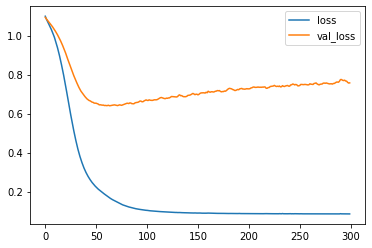

In [35]:
# Testing of the model : return the loss value & metrics values for the model in test mode
score = model.evaluate(X_test, Y_test_1D, batch_size=64)
print('test_loss: ', score[0])
print('test accuracy: ', score[1])

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for a sample")

choose_input = 1
if choose_input == 0:
    # Samples from X_text
    oh_vec = X_test[43,:]
    oh_vec = np.reshape(oh_vec, (1, len(oh_vec)))
    print('shape of oh_vec : ', oh_vec.shape)

    sen = onehot_2_text(oh_vec.T, keywords2)
    print('sentence to predict:', sen)
else:
    # Sample from text input
    inp = input("Type a sentence to classify")
    sen = inp.lower().split()
    oh_vec = sen_to_onehot(sen, keywords2)
    oh_vec
    
# ----------------------------

y_pred = model.predict(oh_vec)
print("predictions:", y_pred)

y_pred = np.array(y_pred)
print(y_pred.shape)
print('Probablity of predictiion (per category) : ', y_pred[0]) 
print(np.sum(y_pred[0]))  # The sum of all category predictions should sum to 1

curmax = y_pred[0][0]
maxind = 0
for i in range(1,len(y_pred[0])):
    if y_pred[0][i] > curmax:
        curmax = y_pred[0][i]
        maxind = i
print(curmax)
print('Maximum index (prediction group): ', maxind)

# Plotting the loss function
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))